In [1]:
%load_ext load_style
%load_style talk.css

# Read SST, Calculate and Subplot monthly climatology

In this notebook, we will show 
* reverse lattitude and sst
* reshape SST to [12 months|nyear|nlat|nlon]
* calculate monthly climatology of global sea surface temperature (SST)
* use subplot to visualize monthly SST climatology

## 1. Load basic libs

In [2]:
% matplotlib inline

from pylab import *
from optparse import OptionParser
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap,shiftgrid,addcyclic, cm
from netCDF4 import Dataset as netcdf # netcdf4-python module

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 9

## 2. Read SST data and pick variables

### 2.1 Read data

In [3]:
ncset= netcdf(r'data/sst.mnmean.nc')

lons = ncset['lon'][:]  # Get longitude
lats = ncset['lat'][::-1]            # Reverse temperature and latitude so they go from south to north.
sst  = ncset['sst'][0:384,::-1,:]    # to make it divisible by 12

### 2.2 Do some transformation

Although it is not necessary to carry out the following operations here, sometimes you have to.

In [4]:
sst,lons  = shiftgrid(180.,sst,lons,start=False) #shift data so lons go from -180 to 180 instead of 0 to 360.
sst,lons  = addcyclic(sst, lons)  

lons,lats = np.meshgrid(lons, lats) 

## 3. Calculate monthly climatology

* Convert sst data into (years|12 months|lat|lon)
* Calculate monthly means of SST from multiple year (i.e., climatology)

In [5]:
ntime,nrow,ncol = sst.shape
sstym  = sst.reshape((12,ntime/12, nrow,ncol),order='F') # convert (yearmonths|lat|lont) to (years|12months|lat|lon)
sstclm = sstym.mean(axis=1) # along the year axis
                   
sstclm.shape

(12L, 180L, 361L)

## 4. Plot monthly climatology

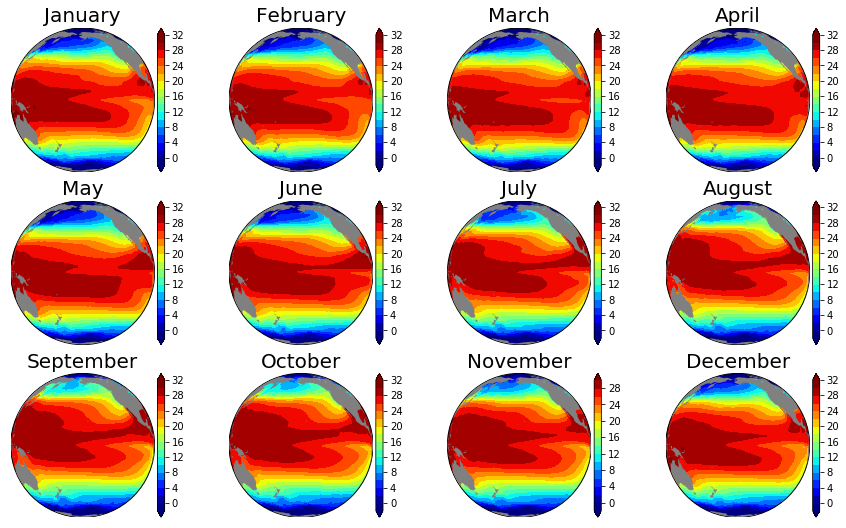

In [6]:
fig, axes = plt.subplots(3,4)
flat_axes = axes.reshape(-1)
m = Basemap(resolution='c', projection='ortho', lat_0=0., lon_0=-160.)

# coordinates transformation
x, y = m(lons, lats)

# string month names
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']

imon = -1
for ax in flat_axes:
    m.ax = ax
    imon = imon + 1 
    cssst = m.contourf(x,y,sstclm[imon], 20, vmin=0, cmap='jet', vmax=30, extend='both') 
    m.colorbar(cssst,"right", size="5%", pad='2%') 
    plt.title( month_lst[imon], fontsize=20) 
    m.fillcontinents(color='gray', lake_color='aqua')

## References

http://unidata.github.io/netcdf4-python/

John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37

Kalnay et al.,The NCEP/NCAR 40-year reanalysis project, Bull. Amer. Meteor. Soc., 77, 437-470, 1996.